# Pymaceuticals Inc.
---

### Analysis

- Overall the tumor size increased as the mouse size increased. Most mice in the sample fell along the correlation for this. 
- Capomulin and Ramicane had the smallest overall tumor size the end of the trial period based on a sampling of four drug regimens, Capomulin, Ramicane, Infubinol, and Ceftamin. 
- In reviewing mouse l509 in the Capomulin regimen, there was a large decline in tumor size between 20 and 35 days. Suprising, there was a small increase in the tumor size after this time. With longer results, it would be interesting to see if this was a anomaly or a continuing trend.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_merge = pd.merge(study_results, mouse_metadata, how='left', on= ["Mouse ID"])
# Display the data table for preview
mouse_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_merge['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = mouse_merge[mouse_merge.duplicated(['Mouse ID', 'Timepoint'])]
dup_mouse['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mousy = mouse_merge.loc[(mouse_merge['Mouse ID']=='g989')]
mousy

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = mouse_merge.loc[(mouse_merge['Mouse ID']!='g989')]
clean_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_mouse = clean_mouse.groupby(['Drug Regimen'])
drug_mean = drug_mouse['Tumor Volume (mm3)'].mean()
drug_median = drug_mouse['Tumor Volume (mm3)'].median()
drug_variance = drug_mouse['Tumor Volume (mm3)'].var()
drug_std = drug_mouse['Tumor Volume (mm3)'].std()
drug_sem = drug_mouse['Tumor Volume (mm3)'].sem()

drug_results = pd.DataFrame({"Mean Tumor Volume":drug_mean,
                                   "Median Tumor Volume":drug_median,
                                   "Tumor Volume Variance":drug_variance,
                                   "Tumor Volume Std. Dev.":drug_std,
                                   "Tumor Volume Std. Err.":drug_sem})

drug_results

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

agg_results = clean_mouse.groupby(['Drug Regimen']).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
agg_results = agg_results.style.set_properties(**{'text-align': 'right'})
agg_results

## Bar and Pie Charts

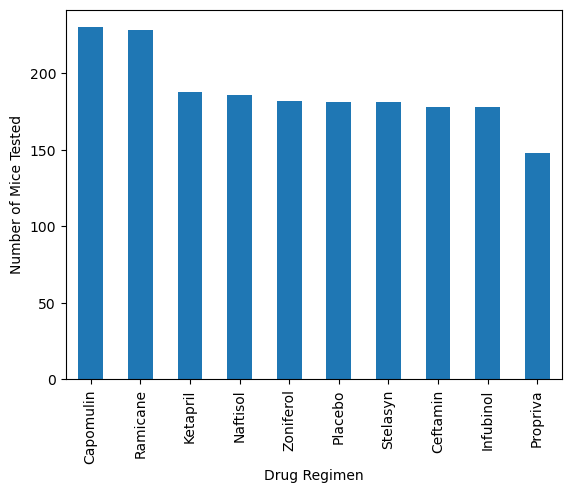

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

count_mouse = (drug_mouse['Timepoint'].count()).sort_values(ascending=False)
count_mouse.plot(kind='bar', xlabel='Drug Regimen', ylabel='Number of Mice Tested')
plt.show()

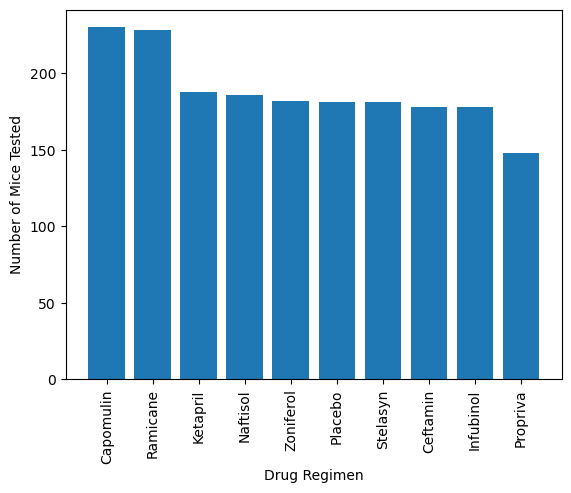

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
import numpy as np
x_axis = np.arange(len(drug_mouse['Drug Regimen']))
ticks = [value for value in x_axis]
plt.bar(x_axis, drug_mouse['Mouse ID'].count().sort_values(ascending=False))
plt.xticks(ticks, ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo',
                   'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva'], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

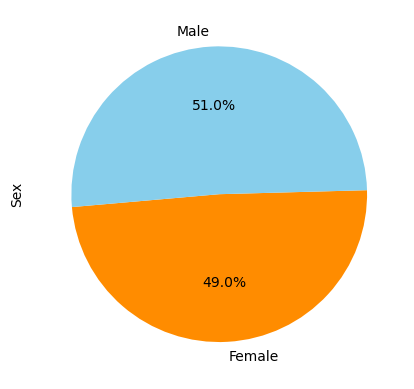

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_mouse.groupby('Sex').size().plot(kind='pie', colors=['darkorange','skyblue'], startangle=185, autopct="%1.1f%%",
                                      ylabel='Sex')
plt.show()

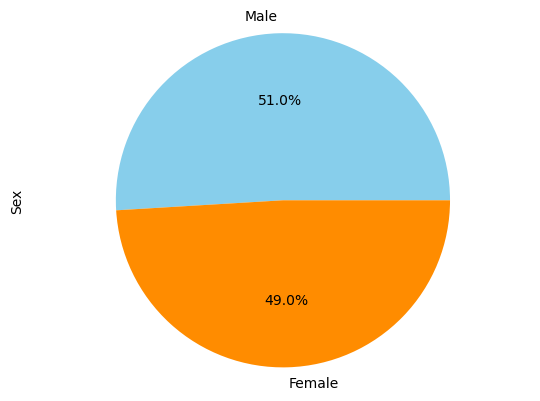

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender=clean_mouse['Sex'].value_counts()
labels=["Male","Female"]
colors=['skyblue','darkorange']
plt.pie(gender, labels=labels, colors=colors, autopct="%1.1f%%")
plt.axis("equal")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_mouse = pd.DataFrame(clean_mouse.groupby(['Mouse ID'])['Timepoint'].max())
max_mouse.reset_index()
max_mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_merge = pd.merge(max_mouse, clean_mouse, on=['Timepoint','Mouse ID'], how="left")
max_merge

,Timepoint,Mouse ID,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,45,a203,67.973419,2,Infubinol,Female,20,23
1,45,a251,65.525743,1,Infubinol,Female,21,25
2,45,a262,70.717621,4,Placebo,Female,17,29
3,45,a275,62.999356,3,Ceftamin,Female,20,28
4,30,a366,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,10,z435,48.710661,0,Propriva,Female,12,26
244,45,z578,30.638696,0,Ramicane,Male,11,16
245,45,z581,62.754451,3,Infubinol,Female,24,25
246,45,z795,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for x in treatments:
    temp_vol = []
    
    for ind in max_merge.index:
        if (max_merge['Drug Regimen'][ind])==x:
            #tumor_volume.append([(max_merge['Drug Regimen'][ind]), (max_merge['Tumor Volume (mm3)'][ind])])
            temp_vol.append((max_merge['Tumor Volume (mm3)'][ind]))
    
    # add subset
    tumor_volume.append(temp_vol)
    temp_vol = pd.DataFrame({'temp_vol':temp_vol})
    #print(temp_vol)
    quartiles = temp_vol['temp_vol'].quantile([.25,.5,.75]) 
    lowerq = quartiles[.25] 
    upperq = quartiles[.75] 
    iqr = upperq-lowerq 
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    #print(quartiles)
    outlier = temp_vol.loc[temp_vol['temp_vol'] < lower_bound]
    print(f"{x}'s potential outliers: {outlier}")
    
    
    
#tumor_volume
    
     
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Empty DataFrame
Columns: [temp_vol]
Index: []
Ramicane's potential outliers: Empty DataFrame
Columns: [temp_vol]
Index: []
Infubinol's potential outliers:     temp_vol
5  36.321346
Ceftamin's potential outliers: Empty DataFrame
Columns: [temp_vol]
Index: []


/var/folders/tb/9ztd83zd25xb9w5xfq415x100000gn/T/ipykernel_36592/2547242828.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments,rotation="vertical")


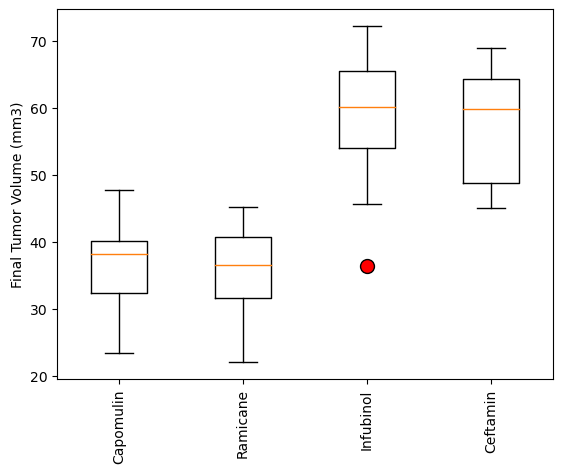

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
deets = dict(markerfacecolor='red', markeredgecolor='black', markersize=10)
x_axis = np.arange(len(treatments))+1
ticks = [value for value in x_axis]
#temp_ticks = [1,2,3,4]
#ax1.set_xticks(temp_ticks)
ax1.set_xticklabels(treatments,rotation="vertical")
#plt.xticks(temp_ticks, treatments,rotation="vertical")
ax1.boxplot(tumor_volume, flierprops=deets)
plt.show()


## Line and Scatter Plots

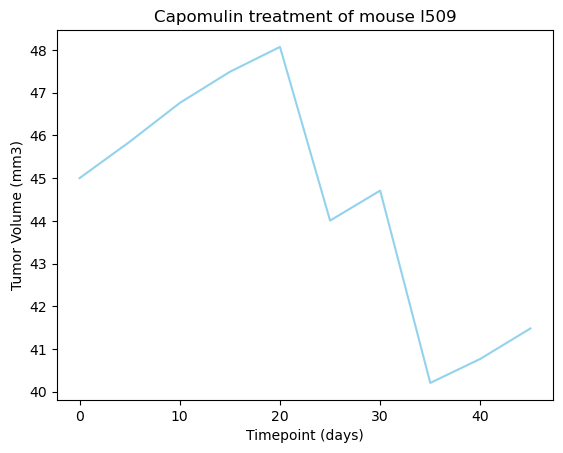

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
special_mouse = clean_mouse.loc[clean_mouse['Mouse ID']=='l509']
mouse_line = plt.plot(special_mouse['Timepoint'], special_mouse['Tumor Volume (mm3)'], color="skyblue", alpha=0.9)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

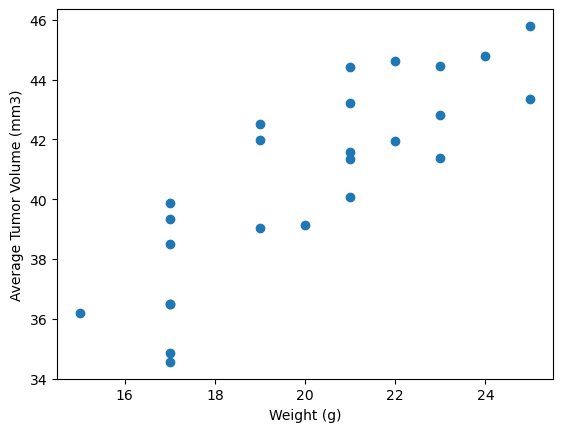

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_mouse = clean_mouse[clean_mouse['Drug Regimen']=='Capomulin']
scatter_mouse = scatter_mouse[['Mouse ID','Tumor Volume (mm3)','Weight (g)','Drug Regimen']]
scatter_mouse = scatter_mouse.groupby(['Mouse ID'])
mousy_weight = scatter_mouse['Weight (g)'].mean()
mousy_volume = scatter_mouse['Tumor Volume (mm3)'].mean()
second_scatter = pd.DataFrame ({'Tumor Volume':mousy_volume,
                               'Weight (g)':mousy_weight})

mouse_scat = plt.scatter(second_scatter['Weight (g)'], second_scatter['Tumor Volume'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


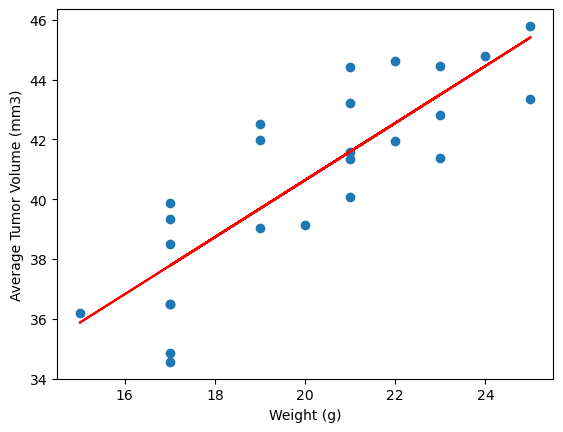

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

x_values = second_scatter['Weight (g)']
y_values = second_scatter['Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
correlation = np.corrcoef(x_values, y_values)
print('The correlation between mouse weight and the average tumor volume is ' + "{:.2f}".format(correlation[0,1]))
plt.show()